# Test Henon Map Data Iter

This is a notebook for testing the Henon Map Data Iter

## Import everything

Modify setting for pytorch

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
currentPath=os.getcwd()

Import matplotlib and others

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

Import Henon Map Generator

In [3]:
currentPath=os.getcwd()
currentPath=os.path.join(currentPath,'..')
currentPath=os.path.join(currentPath,'src')
os.chdir(currentPath)
from DataGenerator.HenonMapDataGen import HenonMapDataGen

## Henon Map Data Iter

Set save path

In [4]:
savepath=os.path.join(currentPath,'..\data\HenonMap\Test')
filename='HenonMapTest3.csv'

Read the data

In [5]:
hmap=HenonMapDataGen(savepath=savepath)
hmap.read_from_CSV(filename)

In [6]:
print(hmap)

Data Info:
----------------------------------------
Data Size: 1000
Data Interval: 5
Data ParamA: 1.4, Data ParamB: 0.3
Data Bound: -1.2
Data HeavyMem: False
Data Seed:
 [0.08628808343444451, 0.01047256162267245, 0.05791303173850359, 0.09306018117985924, 0.030746751612576874, 0.08539528631298632, 0.07203953218418534, 0.08725039216701054, 0.0536789114467842, 0.047240327598474165]
----------------------------------------


Data iter parameters

In [7]:
testSetRatio=0.2
numStep=10
batchSize=2

### Test the random data iter

In [8]:
trainIter,testIter=hmap.get_data_iter(testSetRatio,numStep,batchSize)

TrainIter

In [9]:
X,Y=next(iter(trainIter))
print('X='+str(X))
print('Y='+str(Y))

X=tensor([[ 0.7982,  0.7648,  0.1237, -0.4596, -1.0446,  0.1405,  0.3484,  1.2190,
          0.3618, -0.1618],
        [-0.5013,  1.2151,  1.1433, -0.6347,  0.0681,  0.9685, -1.1161, -0.9320,
          0.0760,  0.7070]])
Y=tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.2118,  1.0596, -1.0433,
          0.6788,  0.6500],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.4635, -0.3793,  0.1269,
          0.8015,  0.3207]])


In [10]:
print('total number of train data:',len(trainIter))

total number of train data: 79


TestIter

In [11]:
X,Y=next(iter(testIter))
print('X='+str(X))
print('Y='+str(Y))

X=tensor([[ 0.0120, -0.3320,  0.6795,  0.9268, -0.6432,  0.7068,  1.1503,  0.5203,
         -0.0664,  0.0608],
        [ 1.1786,  0.6261,  0.1086,  1.0349, -0.1544, -0.8848,  0.2402,  1.1940,
         -0.3935,  0.6540]])
Y=tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.3043, -0.9520,  0.8248,
          1.2719,  0.8019],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.2575,  1.1070, -0.9633,
          1.0937,  0.3549]])


In [12]:
print('total number of test data:',len(testIter))

total number of test data: 19


Visualize the data

Text(0, 0.5, 'Y')

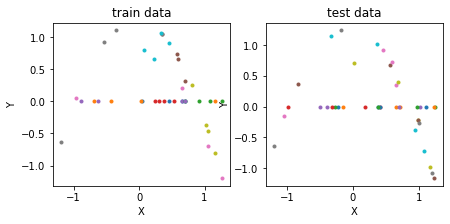

In [13]:
#Visualize the data via matplotlib
fig,axes=plt.subplots(1,2,figsize=(7,3))
for X,Y in trainIter:
    axes[0].plot(X,Y,'.')
axes[0].set_title('train data')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
for X,Y in testIter:
    axes[1].plot(X,Y,'.')
axes[1].set_title('test data')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

### Test the sequential data iter

In [14]:
trainIter,testIter=hmap.get_data_iter(testSetRatio,numStep,batchSize,mask=0,shuffle=False)

TrainIter

In [15]:
i=0
for X,Y in trainIter:
    i+=1
    print('Data'+str(i))
    print('X='+str(X))
    print('Y='+str(Y))
    if i==3:
        break

Data1
X=tensor([[ 0.0307,  0.0854,  0.0720,  0.0873,  0.0537,  0.0472,  1.0157,  0.9959,
          1.0067,  1.0239],
        [-0.9382,  0.4754, -0.9398, -0.7232,  1.2694,  0.1113,  0.8939,  0.1073,
          0.5892, -1.2000]])
Y=tensor([[ 0.0000,  1.0157,  0.9959,  1.0067,  1.0239,  1.0061, -0.4186, -0.3669,
         -0.3927, -0.4516],
        [ 0.1113,  0.8939,  0.1073,  0.5892, -1.2000,  0.7012,  0.0240,  0.7019,
          0.2971, -0.6352]])
Data2
X=tensor([[ 1.0061, -0.4186, -0.3669, -0.3927, -0.4516, -0.4030,  1.0594,  1.1103,
          1.0861,  1.0217],
        [ 0.7012,  0.0240,  0.7019,  0.2971, -0.6352,  0.3451,  1.2674,  0.3424,
          1.0532,  0.0751]])
Y=tensor([[-0.4030,  1.0594,  1.1103,  1.0861,  1.0217,  1.0745, -0.6967, -0.8360,
         -0.7693, -0.5968],
        [ 0.3451,  1.2674,  0.3424,  1.0532,  0.0751,  1.0437, -1.2000,  1.0464,
         -0.4637,  0.8015]])
Data3
X=tensor([[ 1.0745, -0.6967, -0.8360, -0.7693, -0.5968, -0.7373,  0.6382,  0.3545,
          0.497

In [16]:
print(len(trainIter))

78


TestIter

In [17]:
i=0
for X,Y in testIter:
    i+=1
    print('Data'+str(i))
    print('X='+str(X))
    print('Y='+str(Y))
    if i==3:
        break

Data1
X=tensor([[-0.3502,  1.2196, -0.6655, -0.1454,  0.1652,  1.1346, -1.0457,  0.6940,
          0.6599,  1.1627],
        [ 0.6815,  0.9392, -0.2220, -0.1585, -0.2689,  0.4036, -0.3863,  1.2248,
          0.6518,  1.1968]])
Y=tensor([[ 1.1346, -1.0457,  0.6940,  0.6599,  1.1627, -0.9075, -0.1651,  0.1260,
          0.3466, -0.8431],
        [ 0.4036, -0.3863,  1.2248,  0.6518,  1.1968,  0.9764,  1.0729, -1.1666,
          0.3577, -1.0859]])
Data2
X=tensor([[-0.9075, -0.1651,  0.1260,  0.3466, -0.8431,  0.1875,  0.6481,  1.1860,
          1.0298,  0.3537],
        [ 0.9764,  1.0729, -1.1666,  0.3577, -1.0859, -0.2136, -0.7274, -0.5381,
          1.0165, -0.2917]])
Y=tensor([[ 0.1875,  0.6481,  1.1860,  1.0298,  0.3537,  0.6785,  0.3624, -0.9314,
         -0.3806,  0.5720],
        [-0.2136, -0.7274, -0.5381,  1.0165, -0.2917,  1.2290,  0.5811,  0.2447,
         -0.3392,  0.5551]])
Data3
X=tensor([[ 0.6785,  0.3624, -0.9314, -0.3806,  0.5720,  0.4117,  1.0105,  0.1413,
          1.106

In [18]:
print(len(testIter))

18


Visualize the data

Text(0, 0.5, 'Y')

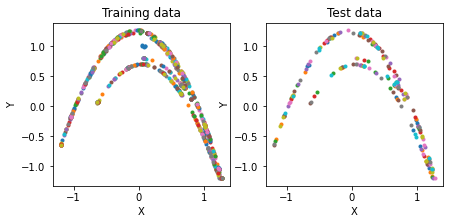

In [19]:
#Visualize the data via matplotlib
fig,axes=plt.subplots(1,2,figsize=(7,3))
for X,Y in trainIter:
    axes[0].plot(X.flatten(),Y.flatten(),'.')
axes[0].set_title('Training data')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

for X,Y in testIter:
    axes[1].plot(X.flatten(),Y.flatten(),'.')
axes[1].set_title('Test data')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

# End of the test